In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

In [99]:
def go(theta, bad, scale):
    N = 1000
    M = 100
    distr = sts.uniform(loc=0, scale=theta)

    y1 = np.array([0.]*N)
    y2 = np.array([0.]*N)
    y3 = np.array([0.]*N)
    y4 = np.array([0.]*N)

    for m in range(1, M+1):
        bigSample = distr.rvs(N);
        for n in range(1, N):
            sample = bigSample[:n]
            y1[n] += (theta - 2.*sample.mean())**2
            y2[n] += (theta - sample.min()*(n+1.))**2
            y3[n] += (theta - sample.min()-sample.max())**2
            y4[n] += (theta - sample.max()*(n+1.)/n)**2

    M = 100.
    for n in range(1, N):
        y1[n] /= M
        y2[n] /= M
        y3[n] /= M
        y4[n] /= M

    numbers = np.arange(1, N+1)
    print 'errors:\n'
    plt.plot(numbers, y1, label='2X')
    if bad: plt.plot(numbers, y2, label='(n+1)X(1)')
    plt.plot(numbers, y3, label='X(1) + X(n)')
    plt.plot(numbers, y4, label= 'X(n) * (n+1)/n')
    
    plt.ylim(0, scale)

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)

# $\theta = 1$

errors:



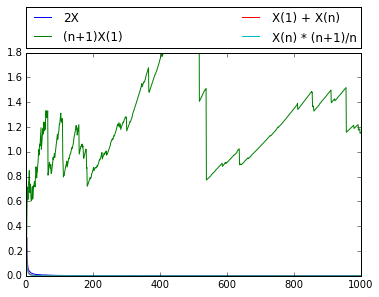

In [100]:
go(1, True, 1.8)

### (n+1)X(1) - очень плохая оценка, будем строить графики без неё

errors:



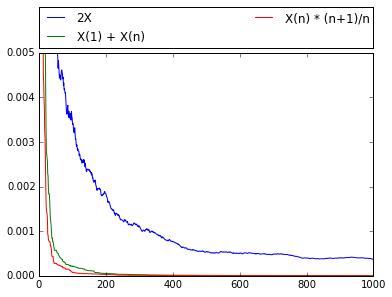

In [101]:
go(1, False,.005)

# $\theta = 3$

errors:



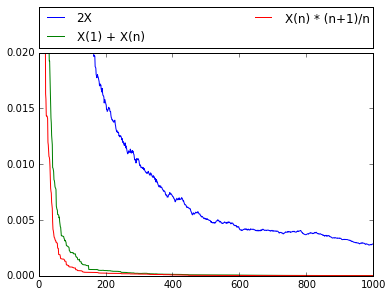

In [102]:
go(3, False, .02)

# $\theta = 10$

errors:



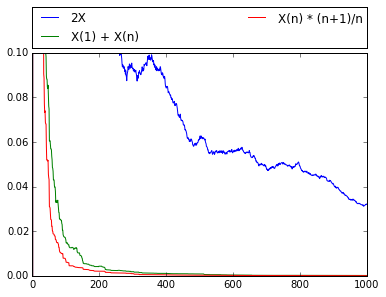

In [103]:
go(10, False, .1)